In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df["log_score"] = np.log(df["score"] + 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197787 entries, 0 to 197786
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  197787 non-null  int64  
 1   year                        197787 non-null  int64  
 2   month                       197787 non-null  int64  
 3   title                       197787 non-null  object 
 4   link_flair_text             197787 non-null  object 
 5   domain                      197787 non-null  object 
 6   score                       197787 non-null  int64  
 7   num_comments                197787 non-null  int64  
 8   sensationalism_score        197787 non-null  float64
 9   jargon_proportion           197622 non-null  float64
 10  is_top_domain_social_media  197787 non-null  bool   
 11  is_top_domain_scientific    197787 non-null  bool   
 12  is_top_domain_news          197787 non-null  bool   
 13  is_top_domain_

In [4]:
domain_order_for_hue = ["repo", "scientific", "news", "social_media", "scam"]
selected_categories = ["Medicine", "Engineering", "Economics", "Social Science", "Computer Science", "Epidemiology"]
top_categories_order = ["Life Sciences", "Social Sciences", "Environmental Sciences", "Engineering & Technology", "Physical Sciences"]


# Sensationalism over different domains and categories


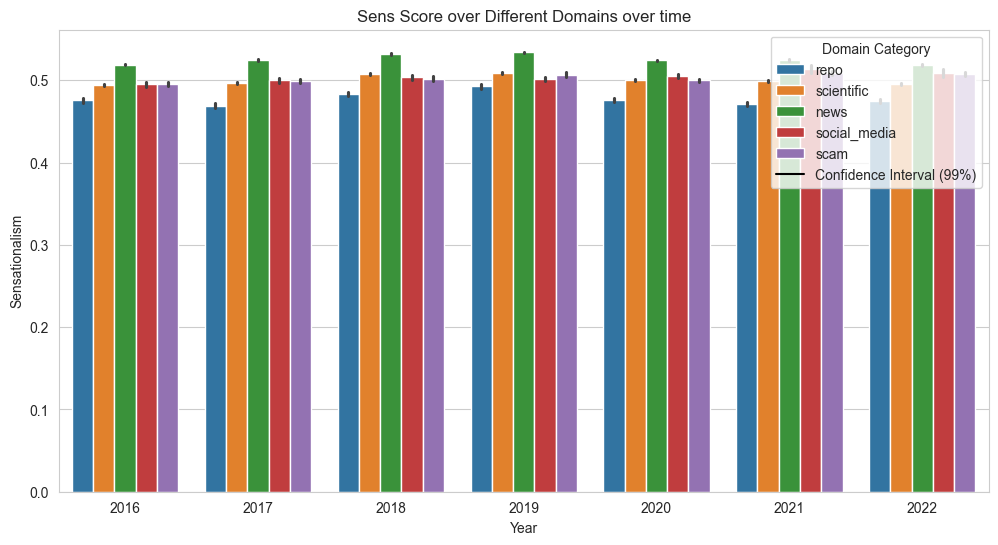

In [6]:
plt.figure(figsize=(12, 6))

sns_plot = sns.barplot(data=df, x = "year", y = "sensationalism_score", hue="label_voting_manual", hue_order=domain_order_for_hue)
plt.title("Sens Score over Different Domains over time")
plt.xlabel("Year")
plt.ylabel("Sensationalism")
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.yscale()
plt.show()

Text(0, 0.5, 'Sens Score')

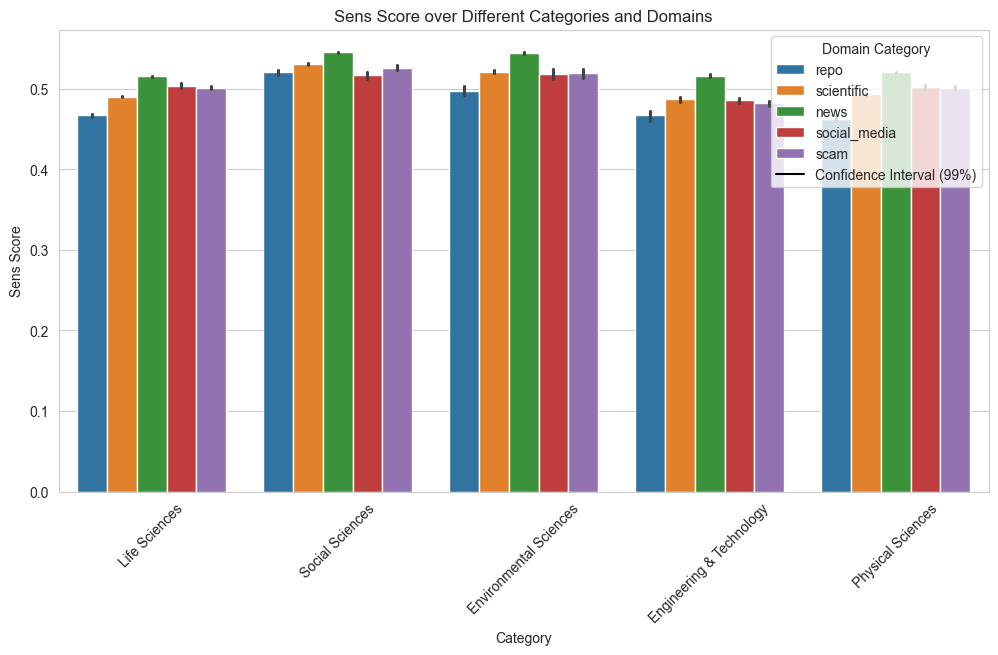

In [8]:
# How does jargon in domains relate over different link flairs
# fig width
plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df, x="top_category", y="sensationalism_score", hue="label_voting_manual",  hue_order=["repo", "scientific", "news", "social_media", "scam"], order=top_categories_order, errorbar=("ci", 99))
plt.xticks(rotation=45)
handles = sns_plot.get_legend_handles_labels()
# add error bars for the 50th percentile to the legend
plt.legend(title="Domain Category", loc="upper right", handles = handles[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.title("Sens Score over Different Categories and Domains")
plt.xlabel("Category")
plt.ylabel("Sens Score")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Medicine'),
  Text(1, 0, 'Engineering'),
  Text(2, 0, 'Economics'),
  Text(3, 0, 'Social Science'),
  Text(4, 0, 'Computer Science'),
  Text(5, 0, 'Epidemiology')])

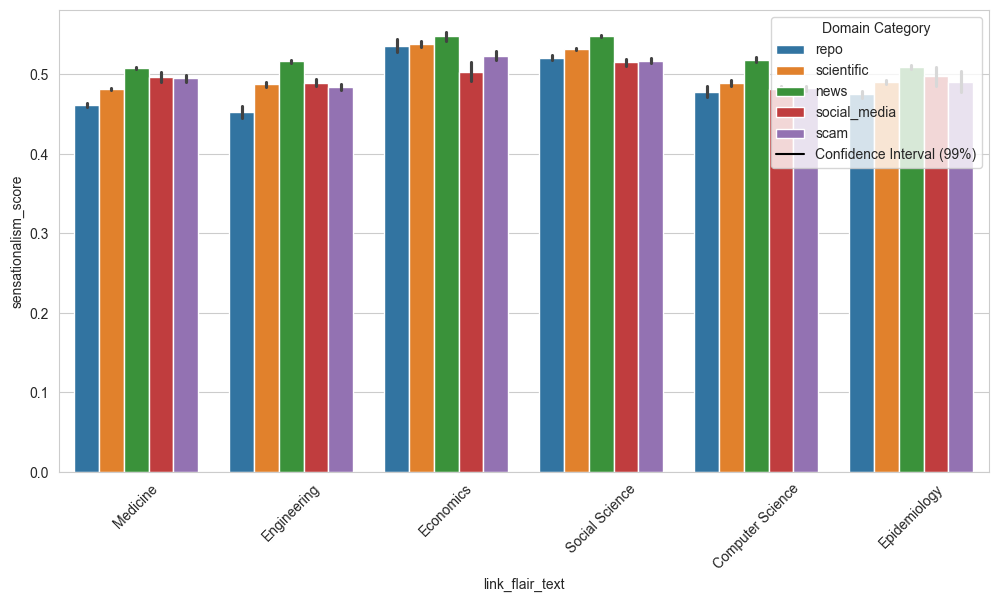

In [9]:

plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df[df["link_flair_text"].isin(selected_categories)], x="link_flair_text", y="sensationalism_score", hue="label_voting_manual",  hue_order=domain_order_for_hue, order=selected_categories)
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.xticks(rotation=45)

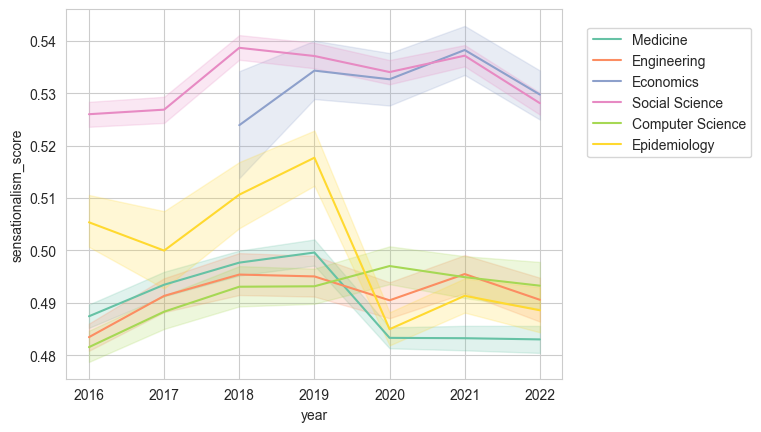

In [11]:
sns_plot = sns.lineplot(data=df, x="year", y="sensationalism_score", hue="link_flair_text", palette ="Set2", hue_order=selected_categories)
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left', borderaxespad=0.)


In [ ]:
sns_plot = sns.lineplot(data=df, x="month", y="sensationalism_score", hue="year", palette="magma")
